### Парсинг данных и создание датафрейма

In [11]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

#%matplotlib notebook

In [12]:
paths = glob.glob(f"build/*ParticleData_t*.csv")

In [13]:
# Вытаскиваем из первого файла названия столбцов
with open(paths[0], 'r') as f:
    lines = []
    while True:
        line = f.readline()
        if len(line)==0:
            break
        if line[0] != '#':
            break
        lines.append(line)
    title = lines[1].replace('#title ', '')[:-1]                        
    sep = chr(int(lines[2].replace('#separator ', '')[:-1]))            
    vsc_sep = chr(int(lines[3].replace('#vector_separator ', '')[:-1])) 
    columns = [' '.join(i.split(' ')[2:])[:-1] for i in lines[4:]]
    metarows_len = len(lines)

In [14]:
data = pd.DataFrame()
for path in paths:
    item = pd.read_csv(path, skiprows=metarows_len, names=columns)
    data = data.append(item, ignore_index=True)

In [15]:
data

,particle_name,X,Y,Z,vX,vY,vZ,energy
0,gamma,0.724852,-0.088897,0.049775,-1.823800,-0.875867,-0.010055,2.023240
1,e-,-0.999962,-0.165629,0.713146,-2.927450,-0.633836,1.297290,2.792910
2,gamma,0.236832,-2.190000,-0.897268,-0.185094,-0.652226,-0.061779,0.680790
3,e-,-0.999933,0.129972,0.626516,-2.873710,0.783132,0.597397,2.569400
4,gamma,-0.446324,0.239131,0.409116,-0.129077,0.114702,0.115173,0.207563
...,...,...,...,...,...,...,...,...
91,e-,-0.999876,-0.918382,-0.903951,-1.221750,-1.274610,-0.003755,1.327040
92,gamma,-0.897615,-0.839857,-0.938599,-0.359395,-0.254507,0.229371,0.496537
93,gamma,-0.172442,-0.356373,-0.438871,-0.130835,0.102821,-0.305751,0.348100
94,gamma,-0.749915,-0.168195,1.301430,-0.060032,-0.010944,0.037515,0.071630


In [16]:
set(data["particle_name"])

{'e-', 'gamma'}

In [17]:
len(data[data["particle_name"]=="e-"])

35

In [18]:
len(data[data["particle_name"]=="gamma"])

61

In [19]:
energy = data["energy"].to_numpy()

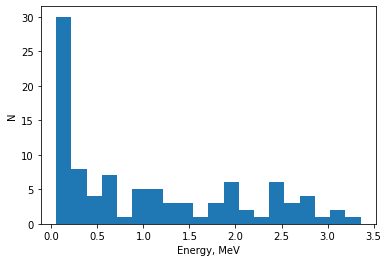

In [24]:
plt.hist(energy, bins=20)
plt.xlabel("Energy, MeV")
plt.ylabel("N")
plt.show()

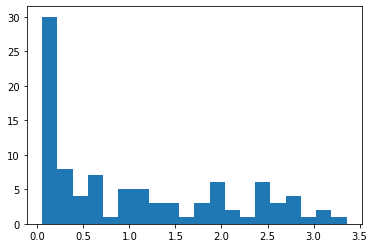

In [27]:
nparticle, energy, _ = plt.hist(energy, bins=20)

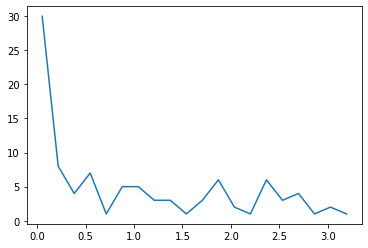

In [30]:
plt.plot(energy[:-1], nparticle)